## REgresión Logística con scikit-learn Introducción (Parte 1)
Vamos a estudiar un problema simple de clasificación.  
Suponer que le preguntamos a 20 estudiantes que están realizando un examen, cuanto tiempo gastaron en prepararse para el examen y se obtuvieron los siguientes  resultados en horas:

In [1]:
# importaciones necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 
                  4., 4.25, 4.5, 4.75, 5., 5.5])

In [3]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

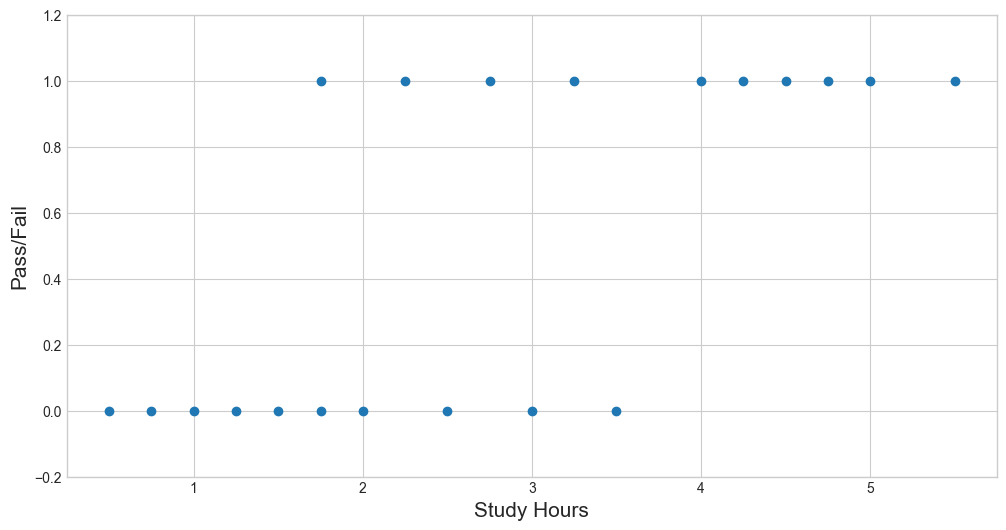

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

En la gráfica anterior en el eje X están las horas de estudio y en el eje Y los resultados del examen (Pasó/Falló), donde un uno corresponde a aprobar y un cero a reprobar. Se puede ver, obviamente, que un estudiante que pasa más horas estudiando aprueba con seguridad.  
También se observa una especie de solapaje, es decir, se muestran resultados que con un menor número de horas dedicadas a estudiar también aprueban el examen.  
Para entender mejor este suceso, vamos a crear un dataframe llamado data:

In [5]:
data = pd.DataFrame({"hours": hours, "success": success})

In [6]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


A modo de prueba, vamos a realizar un ajuste de regresión lineal y analizar un poco los resultados.  
Para ello escogemos las columnas hours y success como variables independiente y dependiente respectivamente:

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept=True)

In [9]:
lm.fit(data.hours.to_frame(), data.success)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
lm.coef_

array([0.23459561])

In [11]:
lm.intercept_

np.float64(-0.15393526898848708)

In [12]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


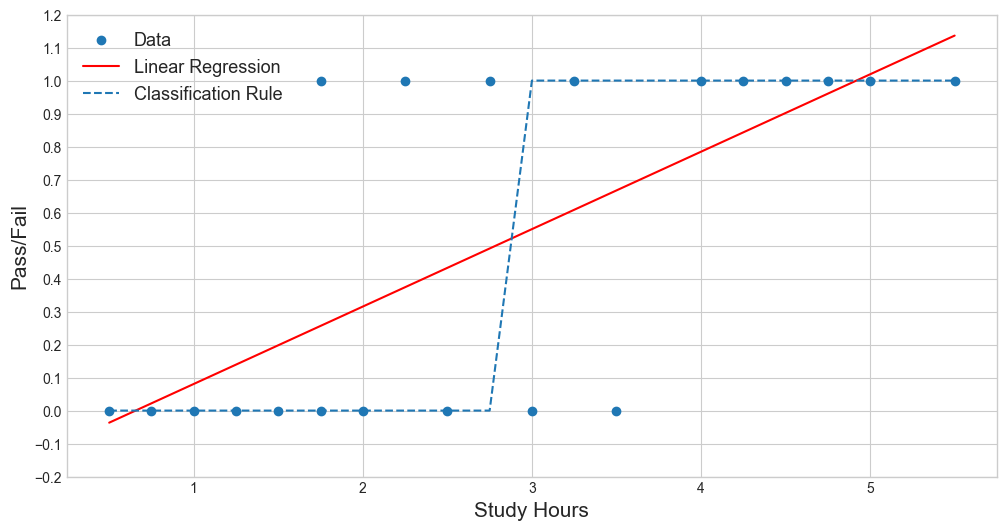

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")

"""En la gráfica se usa la regla de clasificación: si la predicción es mayor a 0.5 se asigna 1 en caso contrario
se asigna 0, esto se implementa en la instrucción que sigue"""
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


Claramente se puede ver que la predicción falla basada en un modelo de regresión lineal.  
Sin embargo, si se usa una regla de clasificación basada en el modelo de regresión lineal vemos que el modelo clasifica bastante bien, salvo por 5 puntos que quedan sin clasificar.

## Regresión Logística con scikit-learn - Introducción (Parte 2)
En la lección anterior resultó que el modelo de regresión lineal no es conveniente para aplicarlo al pronóstico de rendimientos positivos del instrumento financiero.  
Quizás el mejor y más simple modelo a aplicar en estos casos es la Regresión Logística, el cual se va a aplicar en esta lección.  

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lm = LogisticRegression()

In [16]:
data

,hours,success,pred
0,0.50,0,-0.036637
1,0.75,0,0.022011
2,1.00,0,0.080660
3,1.25,0,0.139309
4,1.50,0,0.197958
5,1.75,0,0.256607
6,1.75,1,0.256607
7,2.00,0,0.315256
8,2.25,1,0.373905
9,2.50,0,0.432554


In [17]:
# vamos a ajustar los datos a un modelo de regresión logística
lm.fit(data.hours.to_frame(), data.success)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
"""la columna pred anterior que fue calculada con regresión lineal se va a sobreescribir 
con la predicción del modelo de regresión logística"""
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


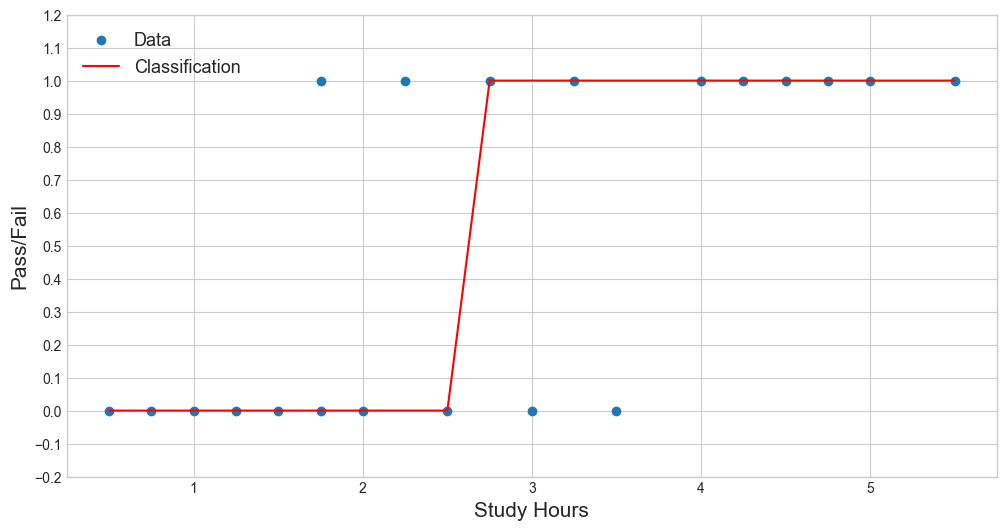

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


en la gráfica anterior vemos que el modelo de regresión logística predice con un 1 para aprobar o con un 0 para reprobar, o sea este modelo es mejor para tareas de clasificación.
también se puede ver en la gráfica que el modelo de regresión logística es un poquito mejor que el modelo de regresión lineal, porque este resultado arroja 4 puntos que no son correctamente clasificados, en tanto que el modelo lineal no clasifica correctamente 5 puntos.  
Con respecto a la realización (performance) de la regresión logística, se puede decir que en el mundo real no siempre es suficiente estudiar muchas horas para aprobar un examen (influyen una cantidad de factores en la probabilidad de aprobar un examen), en la misma forma hay muchos estudiantes que requieren menos horas de estudio para aprobar un examen (por ejemplo un estudiante con un alto IQ).  
Sin embargo, en líneas generales se puede decir que incrementar las horas de estudio incrementará la probabilidad de aprobar unb examen, que es el resultado global que nos da el modelo de regresión logística.  
En realidad, la regresión logística lo que hace es calcular las probabilidades de aprobar y de reprobar y convierte estas probabilidades en un 1 o en un 0, dado que una probabilidad calculada sea mayor o menor al 50% respectivamente. 
Estas probabilidades también se pueden calcular usando el método predict_proba(): 

In [20]:
# calculamos las probabilidades de aprobar o reprobar el examen
proba = lm.predict_proba(data.hours.to_frame())
proba

array([[0.92861721, 0.07138279],
       [0.90707537, 0.09292463],
       [0.87987361, 0.12012639],
       [0.84606045, 0.15393955],
       [0.80484065, 0.19515935],
       [0.75576968, 0.24423032],
       [0.75576968, 0.24423032],
       [0.69897507, 0.30102493],
       [0.63534559, 0.36465441],
       [0.56660579, 0.43339421],
       [0.49520342, 0.50479658],
       [0.42399618, 0.57600382],
       [0.35581092, 0.64418908],
       [0.2930129 , 0.7069871 ],
       [0.18920231, 0.81079769],
       [0.14900776, 0.85099224],
       [0.11612919, 0.88387081],
       [0.08974025, 0.91025975],
       [0.06888056, 0.93111944],
       [0.03998596, 0.96001404]])

Cuando se calculan las probabilidades con el método predict_proba() el resultado es un arreglo de numpy que tiene 2 columnas, como se puede ver arriba.  
La primera columna corresponde a la probabilidad de que el dato repruebe el examen y la segunda columna corresponde a la probabilidad de aprobar (para el mismo dato o número de horas). Notar que la suma de las 2 columnas para un dato (una fila) debe dar 1.

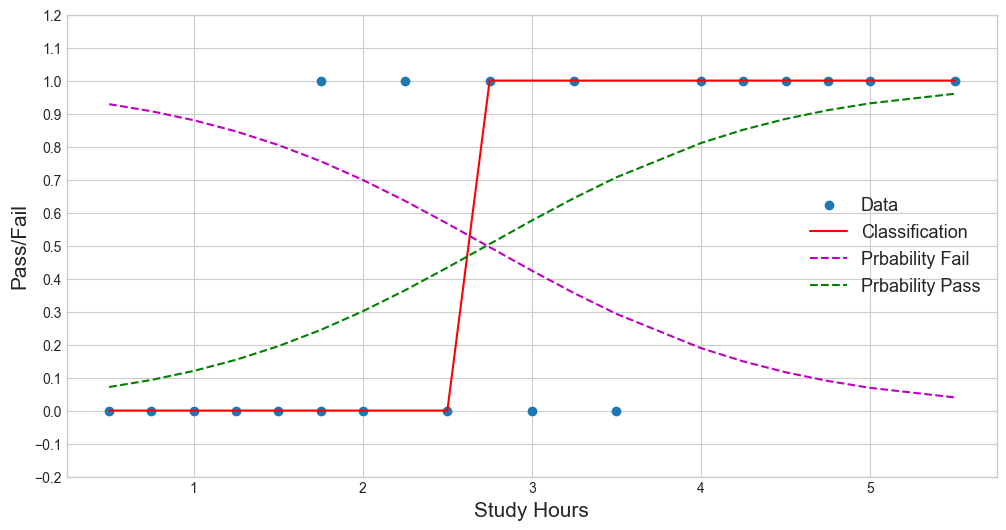

In [21]:
# ahora se grafican estas probabilidades
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Classification")
plt.plot(data.hours, proba[:, 0], "m--", label = "Prbability Fail")
plt.plot(data.hours, proba[:, 1], "g--", label = "Prbability Pass")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


## Obteniendo y Preparando los Datos
Ahora vamos a aplicar el modelo de regresión logística a los datos del instrumento EURUSD del año 2019.

In [22]:
# obtención de los datos
data = pd.read_csv("five_minute.csv", parse_dates=["time"], index_col="time")

In [23]:
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [24]:
data["returns"] = np.log(data.div(data.shift(1)))

In [25]:
data.dropna(inplace=True)

In [26]:
data["direction"] = np.sign(data.returns)

In [27]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


En la tabla de arriba la columnas de la derecha tiene los valores de la dirección del mercado con +1, -1 y también 0. Este 0 significa que en algunos períodos de tiempo tenemos un rendimiento exactamente de cero lo cual puede causar algunos problemas pero que es posible manejar estos casos como veremos más adelante.  
También, es posible contar los valores que están en la columna direction:

In [28]:
data.direction.value_counts()

direction
 1.0    36058
-1.0    35702
 0.0     1959
Name: count, dtype: int64

Como se puede ver, se obtiene más o menos la misma cantidad de rendimientos positivos y negativos. Además, en casi 2000 períodos el rendimiento es cero.  

Tomando la columna direction como variable dependiente queremos hacer predicciones con el modelo de regresión logística, al igual que en el caso dfe regresión lineal tenemos que crear variables independientes o sea los roles de nuestro9 modelo, entonces crearemos 5 lags.

In [29]:
lags = 5

In [30]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [31]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


Entonces las 5 columnas lags corresponden a las 5 características o roles y con este esquema tratamos de predecir la dirección del mercado.  
Como esto corresponde a un problema de clasificación usaremos la regresión logística. 

## Predecir la Dirección del Mercado con Regresión Logística

<h3> NOTA </h3>
Motivado al warning enviado por el sistema, el cual indica que el parámetro multi_class= "ovr" está obsoleto y recomienda usar OneVsRestClassifier(), voy a corregir el notebook.

In [32]:
# corrección
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [33]:
lm = LogisticRegression(C = 1e6, max_iter= 100000, multi_class= "ovr")
#lm = OneVsRestClassifier(LogisticRegression(C= 1e6, max_iter= 100000))

Con la expresión anterior instanciamos el objeto de regresión log;istica lm. Los parámetros usados en la misma son los siguientes:
C: este parámetro corresponde al inverso de la magnitud de la regularización, de tal manera que un valor bajo de C implicaría mucha regularizaxión para compensar un modelo que tenga un sobreajuste (overfitting) excesivo; en tanto que un valor grande de C implica un modelo que presenta un subajuste grande o lo que es lo mismo reducir la regularización (por ejemplo, en este caso se ha ajustado C = 1e6 para reducir la regularización).

max_iter: con este parámetro se ajusta el número de iteraciones a un valor grande de 100000 para tener más pasos de optimización y por consiguiente un resultado más preciso.  

multi_class: Nuestro caso es un ejemplo de un clasificador multiclase (a diferencia de la regresión logística que es un clasificador binario o de dos estados). En este caso tenemos 3 estados +1, -1 y 0. Para solventar este problema ajustamos el parámetro multi-class a OVR que significa uno versus el resto.


In [34]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [57]:
X = data[["lag1", "lag2", "lag3", "lag4", "lag5"]]
y = data["direction"]
lm.fit(X,y)
#lm.fit(data[cols], data.direction)

F:\algo-trading-env\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100000
,multi_class,'ovr'


In [58]:
data["pred"] = lm.predict(X)

In [59]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,1.0


In [60]:
data.pred.value_counts()

pred
1.0    49361
Name: count, dtype: int64

En las celdas anteriores se ha realizado el ajuste de los datos usando los roles (columnas lags) como parámetro x (variable independiente) y la columna direction como variable dependiente y.  

También se ha realizado una predicción "en la muestra" utilizando los datos de entrenamiento, estos resultados se guardan en la columna pred. Estos valores corresponden a la dirección del mercado.  

Además se ha realizado el conteo de estos valores con el resultado que nuestro modelo predice más movimientos al alza que a la baja.  

También se puede calcular la tasa de aciertos:

In [61]:
hits = np.sign(data.direction * data.pred).value_counts()

In [62]:
hits

 1.0    24714
-1.0    24035
 0.0      612
Name: count, dtype: int64

En la celda anterior se muestran los resultados de la tasa de aciertos obtenida con los datos del conjunto de entrenamiento (in-sample) y se puede ver que resultan más predicciones correctas que predicciones incorrectas.  
También se puede calcular la tasa de aciertos:

In [41]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.48914724475676263)

Aqui se obtiene un 49% aprox.  
También se puede obtener esta métrica usando scikit-learn:

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_true = data.direction, y_pred = data.pred)

0.48914724475676263

En la celda anterior se ha usado el método accuracy_score de scikit-learn y al cual se le pasa la dirección real del mercado y la dirección pronosticada.  
Se puede ver que se obtiene básicamente el mismo valor anterior de 49%.  

Para nuestro estudio, estamos principalmente interesados en la realización absoluta y también la sobre realización relativa a B/H.

## Backtesting en la muestra y el Sesgo de Anticipación
Ahora vamos a realizar un backtest en la muestra (con el conjunto de entrenamiento) y nuevamente el problema que surge aqui es el sesgo de anticipación, de tal manera que este backtest realmente no es útil ni confiable.  
No obstante, cuando usado en conjunto con un backtest fuera de la muestra nos permite identificar la presencia de notables subajustes o sobreajustes, de tal manera que si la estrategia opera mucho mejor en el backtest, esto claramente indica un sobreajuste.  
Ahora, en este ejemplo se esperaría un subajuste y no un sobreajuste; pero por razones de completitud lo mejor sería analizar los datos.

In [44]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [45]:
# calculando los rendimientos de la estrategia
data["strategy"] = data.pred * data.returns

In [46]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

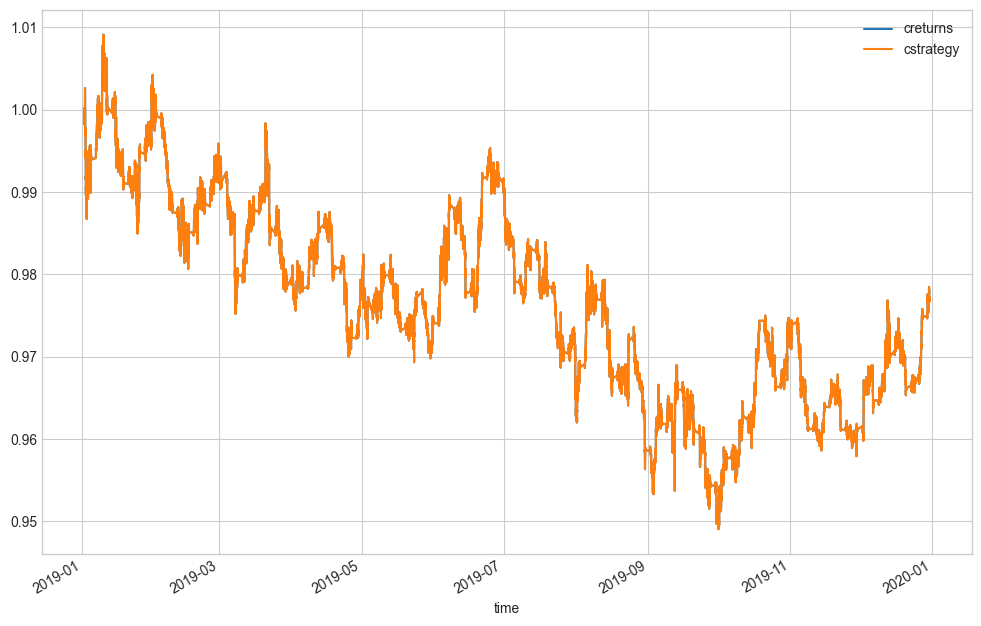

In [47]:
data[["creturns", "cstrategy"]].plot(figsize=(12, 8))
plt.show()

__NOTA__
Obviamente, el resultado que muestra la gráfica de arriba no concuerda con lo que muestra el alemán en el video de esta clase: __In-sample Backtesting and the Look-ahead-bias.mp4__, en consecuencia voy a pasar al siguiente video.  
La conclusión de la lección es que (después de contar los trades) se realizan casi 30000 operaciones completas, lo cual es ineficiente y por lo tanto va a realizar un backtest con datos de prueba (out-sample) para ver si esta estrategia se puede generalizar.

## Prueba con un conjunto de prueba (out-sample test)
Ahora se va a realizar un backtest pero con datos nuevos, es decir con un conjunto de prueba. Para ello se va a usar el archivo test_set.csv que contiene precios de 5 minutos del instrumento EURUSD de enero a agosto de 2020

In [48]:
# cargar los datos de precios
data = pd.read_csv("test_set.csv", parse_dates=["time"], index_col="time")
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [49]:
# calcular el logaritmo de los rendimientos
data["returns"] = np.log(data.div(data.shift(1)))

In [50]:
# y la dirección del mercado
data["direction"] = np.sign(data.returns)

In [51]:
data

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [52]:
# ahora sw calculan las 5 características con los rendimientos anteriores
lags = 5

In [53]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [54]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [55]:
# hacer la predicción con el modelo entrenado
data["pred"] = lm.predict(data[cols])

In [56]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.0
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000,1.0
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187,1.0
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071,1.0
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022,1.0
...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046,1.0
